In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

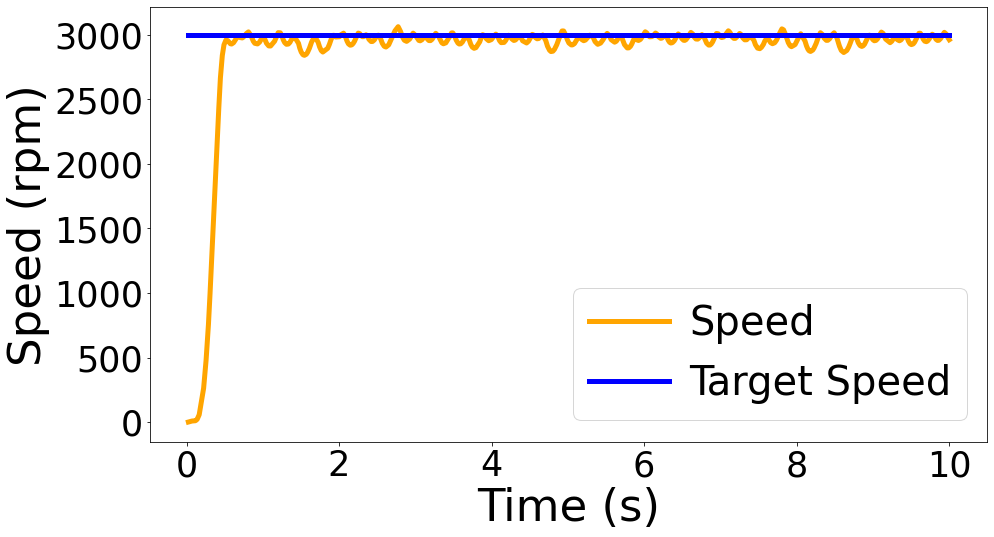

In [123]:
base_dir = "../logs/current_log/"
log_file = "motor_001.csv"

df = pd.read_csv(os.path.join(base_dir,log_file))

COLORS = ['orange', 'orchid', 'purple', 'blue', 'darksalmon']
MARKER_SIZE = 11
LINE_WIDTH = 5

TARGET_SPEED = 3000


fig, axes = plt.subplots(1, 1, figsize=(15, 8))

x = list(range(1,17))


# 折线图
axes.plot(df["time"].values, df["speed"].values, color='orange', label="Speed",  linewidth=LINE_WIDTH)
axes.plot(df["time"].values, [TARGET_SPEED]*len(df["speed"]), color='blue', label="Target Speed", linewidth=LINE_WIDTH, linestyle='-')
# 
plt.legend(loc=1, fontsize=40, bbox_to_anchor = (1,0.4), title_fontsize=25, columnspacing=1.2, handletextpad=0.5)

axes.grid(which='minor', c='lightgrey')

#设置坐标标签标注和字体大小
plt.xlabel("Time (s)",fontsize=45)
plt.ylabel("Speed (rpm)",fontsize=45)

#设置坐标刻度字体大小
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

# plt.title(f"speed")
plt.savefig(f"./delay_1ms.png",bbox_inches = 'tight')
plt.show()